# R for Drug Development

## Pharmacokinetics

### [See orginal post](https://rstudio-pubs-static.s3.amazonaws.com/583410_576b7d609e8e490394ab3f4889b43e2e.html)

![](Pharmacokinetics-1.jpg)

### Example
For example, consider a drug administered by infusion at a constant rate of ```I=20 mg/h```. The drug has a elimination constant of 0.02 /s and the volume of distribution of the patient ```Vd``` is estimated to be 20 l. The drug is administered for 300 h, and then stopped.

Let us see how the plasma concentration varies with time.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
t=seq(0.01,600,0.01)
I=20
k=0.02
V=20
C=ifelse(t<300,(I/(k*V))*(1-exp(-k*t)),(I/(k*V))*exp(-k*(t-300)))
df<-tibble(t=t,C=C)
glimpse(df)

Rows: 60,000
Columns: 2
$ t <dbl> 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.…
$ C <dbl> 0.00999900, 0.01999600, 0.02999100, 0.03998400, 0.04997501, 0.059964…


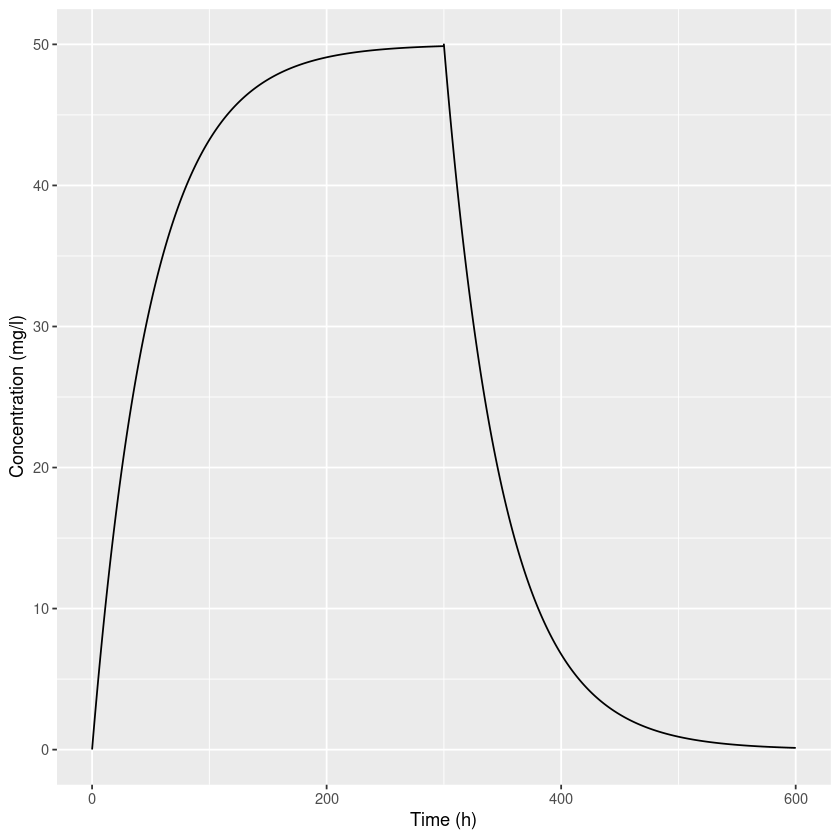

In [3]:
g<-ggplot(df,aes(x=t,y=C))+
  geom_line()+
  xlab('Time (h)')+
  ylab('Concentration (mg/l)')
g

### Questions
#### Determine steady state concentration
What is the steady state concentration of this drug? Is it what you expect, given the values of I, k and Vd?

#### Determine elimination constant
Suppose you only had the data, how would you determine the value of k from the data? To do this, we should study the period after after 300 h, when infusion has stopped

How would you plot the data to show only the data for `t > 300 h`?

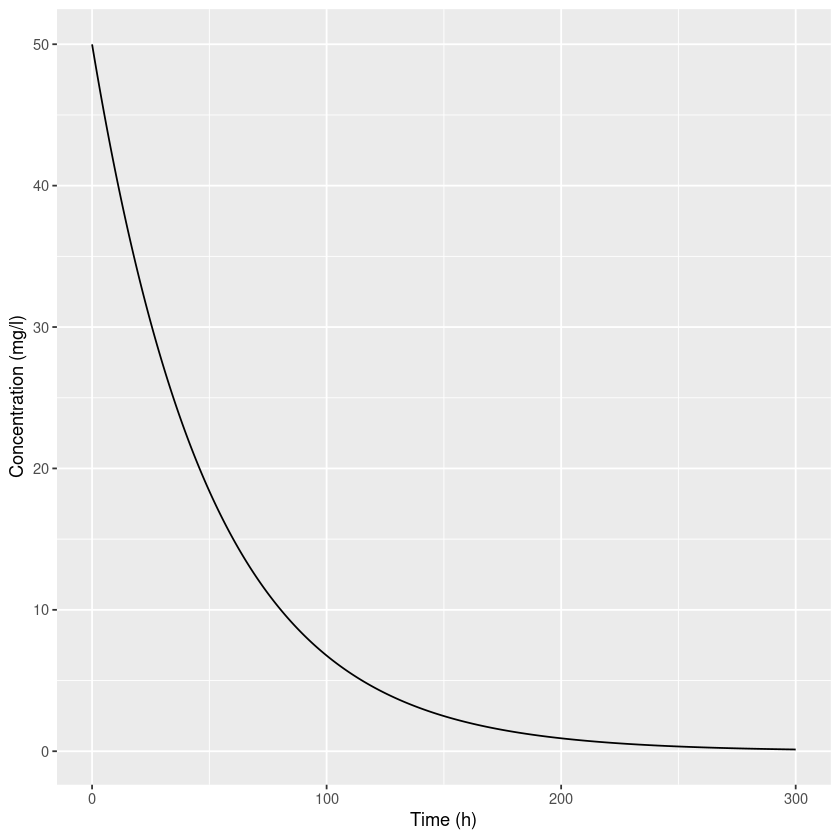

In [4]:
library(tidyverse)
df_elim<-filter(df,t>300)
df_elim<-mutate(df_elim,t=t-300)

g<-ggplot(df_elim,aes(x=t,y=C))+
  geom_line()+
  xlab('Time (h)')+
  ylab('Concentration (mg/l)')
g

![](Pharmacokinetics-2.jpg)

In [5]:
df_elim<-mutate(df_elim,logC=log(C))
glimpse(df_elim)

Rows: 30,000
Columns: 3
$ t    <dbl> 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11,…
$ C    <dbl> 49.99000, 49.98000, 49.97001, 49.96002, 49.95002, 49.94004, 49.93…
$ logC <dbl> 3.911823, 3.911623, 3.911423, 3.911223, 3.911023, 3.910823, 3.910…


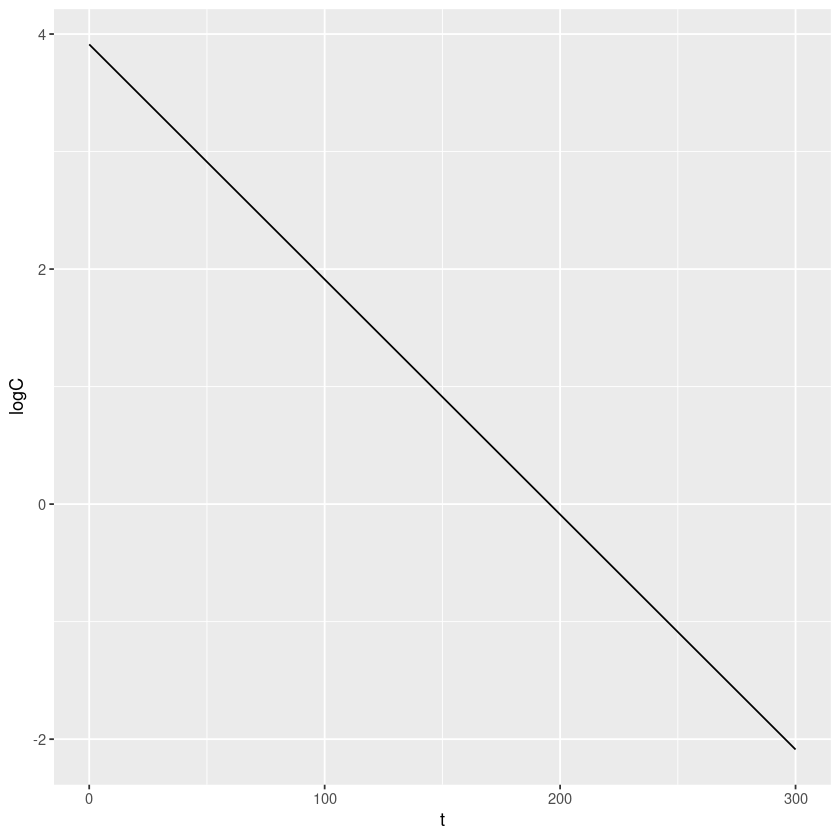

In [6]:
g<-ggplot(df_elim,aes(x=t,y=logC))+
  geom_line()
g

In [7]:
fit_elim<-lm(logC~t,data=df_elim)
summary(fit_elim)


Call:
lm(formula = logC ~ t, data = df_elim)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.121e-13 -1.500e-16 -1.000e-17  2.100e-16  8.600e-16 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  3.912e+00  2.789e-17  1.403e+17   <2e-16 ***
t           -2.000e-02  1.610e-19 -1.242e+17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.415e-15 on 29998 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.543e+34 on 1 and 29998 DF,  p-value: < 2.2e-16


In [8]:
k=-coefficients(fit_elim)[2]
k

t 
0.02

### Determine Half-life

![](Pharmacokinetics-3.jpg)

In [9]:
k=0.05
V=20
t_half=log(2)/k
t_half

[1] 13.86294